<a href="https://colab.research.google.com/github/Shankar-Hadimani/ai-ml-engineering/blob/master/Text_Classification_with_TFIDF_AutoML_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
!pip install h2o

In [80]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML

In [81]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 34 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_k1y77k
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.835 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [82]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:
df = pd.read_csv('https://github.com/Shankar-Hadimani/ai-ml-engineering/blob/master/dataset/consumer_compliants.zip?raw=true', compression='zip', sep=',', quotechar='"')

In [84]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [85]:
pd.set_option('display.max_columns', None)

In [86]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,4/3/2020,Vehicle loan or lease,Loan,Getting a loan or lease,Fraudulent loan,"This auto loan was opened on XX/XX/2020 in XXXX, NC with BB & T in...",Company has responded to the consumer and the CFPB and chooses not...,TRUIST FINANCIAL CORPORATION,PA,None,None,Consent provided,Web,4/3/2020,Closed with explanation,Yes,NaN,3591341
1,3/12/2020,Debt collection,Payday loan debt,Attempts to collect debt not owed,Debt is not yours,In XXXX of 2019 I noticed a debt for {$620.00} on my credit which ...,None,CURO Intermediate Holdings,CO,806XX,None,Consent provided,Web,3/12/2020,Closed with explanation,Yes,NaN,3564184
2,2/6/2020,Vehicle loan or lease,Loan,Getting a loan or lease,Credit denial,"As stated from Capital One, XXXX XX/XX/XXXX and XXXX 2018, My wife...",None,CAPITAL ONE FINANCIAL CORPORATION,OH,430XX,None,Consent provided,Web,2/6/2020,Closed with explanation,Yes,NaN,3521949
3,3/6/2020,Checking or savings account,Savings account,Managing an account,Banking errors,"Please see CFPB case XXXX. \n\nCapital One, in the letter they pro...",None,CAPITAL ONE FINANCIAL CORPORATION,CA,None,None,Consent provided,Web,3/6/2020,Closed with explanation,Yes,NaN,3556237
4,2/14/2020,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,This debt was incurred due to medical malpractice ( XXXX XXXX XXXX...,Company believes it acted appropriately as authorized by contract ...,"Merchants and Professional Bureau, Inc.",OH,432XX,None,Consent provided,Web,2/14/2020,Closed with explanation,Yes,NaN,3531704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57448,2/29/2020,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,I am attempting to make a payment toward my student loans on the N...,None,"Nelnet, Inc.",KS,None,None,Consent provided,Web,2/29/2020,Closed with explanation,Yes,NaN,3549178
57449,2/11/2020,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,Received letter for {$480.00}. Original creditor didnt contact me ...,Company has responded to the consumer and the CFPB and chooses not...,"The Receivable Management Services LLC, New York, NY Branch",AZ,853XX,None,Consent provided,Web,2/18/2020,Closed with explanation,Yes,NaN,3527928
57450,2/29/2020,Debt collection,Other debt,Communication tactics,"Used obscene, profane, or other abusive language",entire time 10 years until XX/XX/2020. XXXX makes my blood boil. I...,Company has responded to the consumer and the CFPB and chooses not...,"Convergent Resources, Inc.",NJ,8101,None,Consent provided,Web,2/29/2020,Closed with explanation,Yes,NaN,3549238
57451,1/16/2020,Checking or savings account,Checking account,Problem with a lender or other company charging your account,Transaction was not authorized,I am a customer with Wells Fargo Bank. Recently money was withdraw...,Company has responded to the consumer and the CFPB and chooses not...,WELLS FARGO & COMPANY,AZ,852XX,None,Consent provided,Web,1/22/2020,Closed with explanation,Yes,NaN,3498566


In [87]:
df['Product'].value_counts()

Debt collection                21772
Credit card or prepaid card    13193
Mortgage                        9799
Checking or savings account     7003
Student loan                    2950
Vehicle loan or lease           2736
Name: Product, dtype: int64

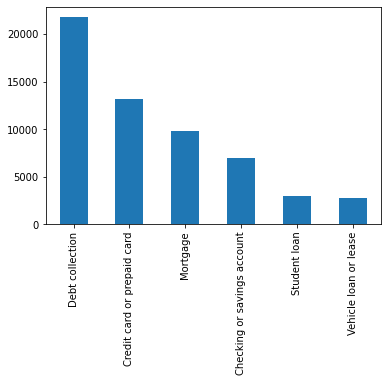

In [88]:
df['Product'].value_counts().plot(kind='bar')

In [89]:
df['Company'].value_counts()

CITIBANK, N.A.                                          3226
CAPITAL ONE FINANCIAL CORPORATION                       2711
BANK OF AMERICA, NATIONAL ASSOCIATION                   2580
JPMORGAN CHASE & CO.                                    2409
WELLS FARGO & COMPANY                                   2001
                                                        ... 
Bushwood Capital Group, Inc.                               1
Stephen Einstein & Associates, P.C.                        1
Lend You Cash, Inc                                         1
Thomas & Thomas Attorneys and Counselors at Law, LLC       1
Rickart Collection Systems, Inc.                           1
Name: Company, Length: 2197, dtype: int64

In [90]:
complaints_df = df[['Consumer complaint narrative','Product','Company']].rename(columns={'Consumer complaint narrative':'Complaints'})

In [91]:
pd.set_option('display.max_colwidth',None)

In [92]:
complaints_df

,Complaints,Product,Company
0,"This auto loan was opened on XX/XX/2020 in XXXX, NC with BB & T in my name. I have NEVER been to North Carolina and I have NEVER been a resident. I have filed a dispute twice through my credit bureaus but both times BB & T has claimed that this is an accurate loan. Which I wasn't aware of until today. I have tried to contact BB & T multiple times but I have never gotten through to a live person. I do n't drive and I have never owned a car before. I didn't have any knowledge of this account until I checked XXXXXXXX XXXX and noticed it. I've tried twice to dispute it. Additionally I never received any bills or information about this account. This is my last resort in trying to remove this fraudulent loan off of my account.",Vehicle loan or lease,TRUIST FINANCIAL CORPORATION
1,"In XXXX of 2019 I noticed a debt for {$620.00} on my credit which i believed was mine I thought speedy cash had bought one of my old debts and sold it to XXXX XXXX XXXX XXXX. I contacted XXXX XXXX XXXX XXXX and after several attempts of giving my full name, nothing came up in their system. I gave my social and the rep said the account popped up but DID NOT tell me that the account was under someone elses name and continued to let me make a payment. The payment was for {$120.00}. Confirmation number-XXXX. After realizing it was not my account, I called back to get my money back and inform them of the mistake. I was told i needed to mail them an FTC report and dispute letter to get my money back. I completed all of this and when i called again they said they transferred the account back to speedy cash for fraud review and I would need to contact them. After contacting them i was again told that i can not get my money back. The issue im having is this representative at XXXX XXXX played blind to obvious fraud and let an innocent person make a payment on someone elses debt and i want my money back.",Debt collection,CURO Intermediate Holdings
2,"As stated from Capital One, XXXX XX/XX/XXXX and XXXX 2018, My wife and I went to several car dealerships to request for a car loan to get a used car. However, according to their credit requirements unfortunately my credit score was insufficient for the car loan approval at that time. It seemed as though they pulled my credit report multiple times.",Vehicle loan or lease,CAPITAL ONE FINANCIAL CORPORATION
3,"Please see CFPB case XXXX. \n\nCapital One, in the letter they provided ( and attached to that case as their response ) said this : "" The funds were reversed and sent back to XXXX XXXX XXXX on XX/XX/XXXX ''. \n\nXXXX XXXX XXXX ( now XXXX XXXX ) has not received these funds. Staff at XXXX XXXX - and also staff at the account-holder 's business - have looked for return of my money ( {$650.00} ) and find nothing. \n\nCapital One needs to document - actually prove - they returned the funds, as stated in their letter. Capital One must provide electronic information, if the return was made that way, or document the paper check they sent back to XXXX XXXX. \n\nI've left 3 messages about this problem for the person who signed the letter ( XXXX ) from Capital One. I have received no call-backs. \n\nSummary : Capital One said they returned my money on XX/XX/XXXX : they did not. If they continue claim they did, then they need to prove that.",Checking or savings account,CAPITAL ONE FINANCIAL CORPORATION
4,"This debt was incurred due to medical malpractice ( XXXX XXXX XXXX, XXXX, TX ). I asked the doctor to turn over my claim to his malpractice insurance company. This has cost me thousands of dollars to XXXX XXXX XXXX. I am still trying to collect damages from this doctor. He never responded and turned over me to collections Merchants and Professional Collection Bureau , Inc. I sent them a letter describing exactly this issue and instead of not contacting me and verifying my debt they start reporting this debt to the credit reporting agencies. They never verified the debt, like I asked and they never

In [93]:
complaints_df['Product'].value_counts()

Debt collection                21772
Credit card or prepaid card    13193
Mortgage                        9799
Checking or savings account     7003
Student loan                    2950
Vehicle loan or lease           2736
Name: Product, dtype: int64

In [94]:
target = {'Debt collection':0,
          'Credit card or prepaid card':1,
          'Mortgage':2,
          'Checking or savings account':3,
          'Student loan':4,
          'Vehicle loan or lease':5,
          }

In [95]:
target

{'Checking or savings account': 3,
 'Credit card or prepaid card': 1,
 'Debt collection': 0,
 'Mortgage': 2,
 'Student loan': 4,
 'Vehicle loan or lease': 5}

In [96]:
complaints_df['target'] = complaints_df['Product'].map(target)

In [97]:
complaints_df

,Complaints,Product,Company,target
0,"This auto loan was opened on XX/XX/2020 in XXXX, NC with BB & T in my name. I have NEVER been to North Carolina and I have NEVER been a resident. I have filed a dispute twice through my credit bureaus but both times BB & T has claimed that this is an accurate loan. Which I wasn't aware of until today. I have tried to contact BB & T multiple times but I have never gotten through to a live person. I do n't drive and I have never owned a car before. I didn't have any knowledge of this account until I checked XXXXXXXX XXXX and noticed it. I've tried twice to dispute it. Additionally I never received any bills or information about this account. This is my last resort in trying to remove this fraudulent loan off of my account.",Vehicle loan or lease,TRUIST FINANCIAL CORPORATION,5
1,"In XXXX of 2019 I noticed a debt for {$620.00} on my credit which i believed was mine I thought speedy cash had bought one of my old debts and sold it to XXXX XXXX XXXX XXXX. I contacted XXXX XXXX XXXX XXXX and after several attempts of giving my full name, nothing came up in their system. I gave my social and the rep said the account popped up but DID NOT tell me that the account was under someone elses name and continued to let me make a payment. The payment was for {$120.00}. Confirmation number-XXXX. After realizing it was not my account, I called back to get my money back and inform them of the mistake. I was told i needed to mail them an FTC report and dispute letter to get my money back. I completed all of this and when i called again they said they transferred the account back to speedy cash for fraud review and I would need to contact them. After contacting them i was again told that i can not get my money back. The issue im having is this representative at XXXX XXXX played blind to obvious fraud and let an innocent person make a payment on someone elses debt and i want my money back.",Debt collection,CURO Intermediate Holdings,0
2,"As stated from Capital One, XXXX XX/XX/XXXX and XXXX 2018, My wife and I went to several car dealerships to request for a car loan to get a used car. However, according to their credit requirements unfortunately my credit score was insufficient for the car loan approval at that time. It seemed as though they pulled my credit report multiple times.",Vehicle loan or lease,CAPITAL ONE FINANCIAL CORPORATION,5
3,"Please see CFPB case XXXX. \n\nCapital One, in the letter they provided ( and attached to that case as their response ) said this : "" The funds were reversed and sent back to XXXX XXXX XXXX on XX/XX/XXXX ''. \n\nXXXX XXXX XXXX ( now XXXX XXXX ) has not received these funds. Staff at XXXX XXXX - and also staff at the account-holder 's business - have looked for return of my money ( {$650.00} ) and find nothing. \n\nCapital One needs to document - actually prove - they returned the funds, as stated in their letter. Capital One must provide electronic information, if the return was made that way, or document the paper check they sent back to XXXX XXXX. \n\nI've left 3 messages about this problem for the person who signed the letter ( XXXX ) from Capital One. I have received no call-backs. \n\nSummary : Capital One said they returned my money on XX/XX/XXXX : they did not. If they continue claim they did, then they need to prove that.",Checking or savings account,CAPITAL ONE FINANCIAL CORPORATION,3
4,"This debt was incurred due to medical malpractice ( XXXX XXXX XXXX, XXXX, TX ). I asked the doctor to turn over my claim to his malpractice insurance company. This has cost me thousands of dollars to XXXX XXXX XXXX. I am still trying to collect damages from this doctor. He never responded and turned over me to collections Merchants and Professional Collection Bureau , Inc. I sent them a letter describing exactly this issue and instead of not contacting me and verifying my debt they start reporting this debt to the credit reporting agencies. They never verified the debt, like I asked

In [98]:
X_train, X_test = train_test_split(complaints_df, test_size=0.8, random_state= 111)

In [99]:
stemmer = nltk.stem.SnowballStemmer('english')

In [100]:
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
def tokenize(text):
  tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/')))> 2 )]
  toekns = map(str.lower, tokens)
  stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
  return stems


In [102]:
vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))
train_vectors = vectorizer_tf.fit_transform(X_train.Complaints)

In [103]:
train_vectors.A     # it's sparsed vector and values will be non-zero if words exists/occurs, otherwise it will zero

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.09685487,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [104]:
vectorizer_tf.get_feature_names()

['abil',
 'abl',
 'absolut',
 'abus',
 'accept',
 'access',
 'accord',
 'account',
 'account account',
 'account balanc',
 'account close',
 'account credit',
 'account number',
 'account open',
 'account would',
 'accru',
 'acct',
 'accur',
 'acknowledg',
 'action',
 'activ',
 'actual',
 'ad',
 'addit',
 'address',
 'adjust',
 'admit',
 'advanc',
 'advertis',
 'advis',
 'affect',
 'affidavit',
 'afford',
 'after',
 'again',
 'agenc',
 'agent',
 'agre',
 'agreement',
 'alert',
 'alleg',
 'alleg debt',
 'alli',
 'allow',
 'almost',
 'along',
 'alreadi',
 'also',
 'although',
 'alway',
 'america',
 'american',
 'american express',
 'amex',
 'amount',
 'amount owe',
 'and/or',
 'annual',
 'anoth',
 'answer',
 'anyon',
 'anyth',
 'apart',
 'appar',
 'appeal',
 'appear',
 'appli',
 'applic',
 'apprais',
 'appreci',
 'approv',
 'approxim',
 'around',
 'arrang',
 'arriv',
 'ask',
 'assess',
 'asset',
 'assign',
 'assist',
 'associ',
 'assum',
 'assur',
 'attach',
 'attempt',
 'attempt collect

In [105]:
test_vectors = vectorizer_tf.transform(X_test.Complaints)

In [106]:
X_train.shape

(11490, 4)

In [107]:
X_test.shape

(45963, 4)

In [108]:
train_df = pd.DataFrame(train_vectors.toarray(), columns=vectorizer_tf.get_feature_names())
train_df = pd.concat([train_df, X_train['target'].reset_index(drop=True)], axis=1)
train_df

abil       abl  absolut      abus  accept  access  accord   account  \
0       0.0  0.000000      0.0  0.000000     0.0     0.0     0.0  0.000000   
1       0.0  0.000000      0.0  0.000000     0.0     0.0     0.0  0.000000   
2       0.0  0.000000      0.0  0.000000     0.0     0.0     0.0  0.194342   
3       0.0  0.000000      0.0  0.149346     0.0     0.0     0.0  0.070503   
4       0.0  0.064698      0.0  0.000000     0.0     0.0     0.0  0.000000   
...     ...       ...      ...       ...     ...     ...     ...       ...   
11485   0.0  0.000000      0.0  0.000000     0.0     0.0     0.0  0.000000   
11486   0.0  0.000000      0.0  0.000000     0.0     0.0     0.0  0.099265   
11487   0.0  0.000000      0.0  0.000000     0.0     0.0     0.0  0.059222   
11488   0.0  0.000000      0.0  0.000000     0.0     0.0     0.0  0.000000   
11489   0.0  0.000000      0.0  0.000000     0.0     0.0     0.0  0.000000   

       account account  account balanc  account close  account credit  \
0                  0.0        0.000000            0.0             0.0   
1                  0.0        0.000000            0.0             0.0   
2                  0.0        0.000000            0.0             0.0   
3                  0.0        0.000000            0.0             0.0   
4                  0.0        0.000000            0.0             0.0   
...                ...             ...            ...             ...   
11485              0.0        0.000000            0.0             0.0   
11486              0.0        0.158196            0.0             0.0   
11487              0.0        0.000000            0.0             0.0   
11488              0.0        0.000000            0.0             0.0   
11489              0.0        0.000000            0.0             0.0   

       account number  account open  account would  accru  acct  accur  \
0                 0.0           0.0            0.0    0.0   0.0    0.0   
1                 0.0           0.0            0.0    0.0   0.0    0.0   
2                 0.0           0.0            0.0    0.0   0.0    0.0   
3                 0.0           0.0            0.0    0.0   0.0    0.0   
4                 0.0           0.0            0.0    0.0   0.0    0.0   
...               ...           ...            ...    ...   ...    ...   
11485             0.0           0.0            0.0    0.0   0.0    0.0   
11486             0.0           0.0            0.0    0.0   0.0    0.0   
11487             0.0           0.0            0.0    0.0   0.0    0.0   
11488             0.0           0.0            0.0    0.0   0.0    0.0   
11489             0.0           0.0            0.0    0.0   0.0    0.0   

       acknowledg    action  activ  actual   ad     addit   address  adjust  \
0             0.0  0.000000    0.0     0.0  0.0  0.000000  0.000000     0.0   
1             0.0  0.000000    0.0     0.0  0.0  0.000000  0.000000     0.0   
2             0.0  0.000000    0.0     0.0  0.0  0.000000  0.194708     0.0   
3             0.0  0.109274    0.0     0.0  0.0  0.000000  0.000000     0.0   
4             0.0  0.000000    0.0     0.0  0.0  0.000000  0.000000     0.0   
...           ...       ...    ...     ...  ...       ...       ...     ...   
11485         0.0  0.000000    0.0     0.0  0.0  0.000000  0.057400     0.0   
11486         0.0  0.000000    0.0     0.0  0.0  0.000000  0.000000     0.0   
11487         0.0  0.000000    0.0     0.0  0.0  0.123478  0.000000     0.0   
11488         0.0  0.000000    0.0     0.0  0.0  0.000000  0.000000     0.0   
11489         0.0  0.000000    0.0     0.0  0.0  0.036041  0.000000     0.0   

       admit  advanc  advertis     advis  affect  affidavit    afford  \
0        0.0     0.0  0.000000  0.000000     0.0   0.267511  0.000000   
1        0.0     0.0  0.000000  0.000000     0.0   0.000000  0.000000   
2        0.0     0.0  0.000000  0.000000     0.0   0.000000  0.000000   
3        0.0     0.0  0.000000  0.000000     0.0   0.000000  0.

In [109]:
test_df = pd.DataFrame(test_vectors.toarray(), columns=vectorizer_tf.get_feature_names())
test_df = pd.concat([test_df,X_test['target'].reset_index(drop=True)], axis=1)
test_df

abil       abl  absolut  abus  accept    access  accord   account  \
0       0.0  0.086681      0.0   0.0     0.0  0.211795     0.0  0.346502   
1       0.0  0.000000      0.0   0.0     0.0  0.000000     0.0  0.113812   
2       0.0  0.155441      0.0   0.0     0.0  0.000000     0.0  0.233012   
3       0.0  0.088154      0.0   0.0     0.0  0.000000     0.0  0.000000   
4       0.0  0.080287      0.0   0.0     0.0  0.000000     0.0  0.040118   
...     ...       ...      ...   ...     ...       ...     ...       ...   
45958   0.0  0.000000      0.0   0.0     0.0  0.000000     0.0  0.292530   
45959   0.0  0.074546      0.0   0.0     0.0  0.000000     0.0  0.000000   
45960   0.0  0.114362      0.0   0.0     0.0  0.000000     0.0  0.114288   
45961   0.0  0.000000      0.0   0.0     0.0  0.000000     0.0  0.086850   
45962   0.0  0.000000      0.0   0.0     0.0  0.000000     0.0  0.270917   

       account account  account balanc  account close  account credit  \
0                  0.0             0.0       0.000000             0.0   
1                  0.0             0.0       0.000000             0.0   
2                  0.0             0.0       0.205304             0.0   
3                  0.0             0.0       0.000000             0.0   
4                  0.0             0.0       0.000000             0.0   
...                ...             ...            ...             ...   
45958              0.0             0.0       0.000000             0.0   
45959              0.0             0.0       0.000000             0.0   
45960              0.0             0.0       0.000000             0.0   
45961              0.0             0.0       0.000000             0.0   
45962              0.0             0.0       0.000000             0.0   

       account number  account open  account would  accru  acct  accur  \
0                 0.0           0.0            0.0    0.0   0.0    0.0   
1                 0.0           0.0            0.0    0.0   0.0    0.0   
2                 0.0           0.0            0.0    0.0   0.0    0.0   
3                 0.0           0.0            0.0    0.0   0.0    0.0   
4                 0.0           0.0            0.0    0.0   0.0    0.0   
...               ...           ...            ...    ...   ...    ...   
45958             0.0           0.0            0.0    0.0   0.0    0.0   
45959             0.0           0.0            0.0    0.0   0.0    0.0   
45960             0.0           0.0            0.0    0.0   0.0    0.0   
45961             0.0           0.0            0.0    0.0   0.0    0.0   
45962             0.0           0.0            0.0    0.0   0.0    0.0   

       acknowledg  action  activ  actual   ad     addit   address  adjust  \
0             0.0     0.0    0.0     0.0  0.0  0.045154  0.000000     0.0   
1             0.0     0.0    0.0     0.0  0.0  0.000000  0.000000     0.0   
2             0.0     0.0    0.0     0.0  0.0  0.000000  0.000000     0.0   
3             0.0     0.0    0.0     0.0  0.0  0.000000  0.000000     0.0   
4             0.0     0.0    0.0     0.0  0.0  0.000000  0.000000     0.0   
...           ...     ...    ...     ...  ...       ...       ...     ...   
45958         0.0     0.0    0.0     0.0  0.0  0.000000  0.000000     0.0   
45959         0.0     0.0    0.0     0.0  0.0  0.000000  0.000000     0.0   
45960         0.0     0.0    0.0     0.0  0.0  0.000000  0.114503     0.0   
45961         0.0     0.0    0.0     0.0  0.0  0.000000  0.000000     0.0   
45962         0.0     0.0    0.0     0.0  0.0  0.000000  0.000000     0.0   

       admit  advanc  advertis     advis  affect  affidavit    afford  \
0        0.0     0.0       0.0  0.000000     0.0        0.0  0.000000   
1        0.0     0.0       0.0  0.000000     0.0        0.0  0.000000   
2        0.0     0.0       0.0  0.000000     0.0        0.0  0.000000   
3        0.0     0.0       0.0  0.033384     0.0        0.0  0.044108   
4        0.0     0.0       0.0  0.0000

In [110]:
h2o_train_df = h2o.H2OFrame(train_df)
h2o_test_df = h2o.H2OFrame(test_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [111]:
h2o_train_df.types

{'abil': 'real',
 'abl': 'real',
 'absolut': 'real',
 'abus': 'real',
 'accept': 'real',
 'access': 'real',
 'accord': 'real',
 'account': 'real',
 'account account': 'real',
 'account balanc': 'real',
 'account close': 'real',
 'account credit': 'real',
 'account number': 'real',
 'account open': 'real',
 'account would': 'real',
 'accru': 'real',
 'acct': 'real',
 'accur': 'real',
 'acknowledg': 'real',
 'action': 'real',
 'activ': 'real',
 'actual': 'real',
 'ad': 'real',
 'addit': 'real',
 'address': 'real',
 'adjust': 'real',
 'admit': 'real',
 'advanc': 'real',
 'advertis': 'real',
 'advis': 'real',
 'affect': 'real',
 'affidavit': 'real',
 'afford': 'real',
 'after': 'real',
 'again': 'real',
 'agenc': 'real',
 'agent': 'real',
 'agre': 'real',
 'agreement': 'real',
 'alert': 'real',
 'alleg': 'real',
 'alleg debt': 'real',
 'alli': 'real',
 'allow': 'real',
 'almost': 'real',
 'along': 'real',
 'alreadi': 'real',
 'also': 'real',
 'although': 'real',
 'alway': 'real',
 'america

In [112]:
# convert target field to 'enumeration' type, otherwise H20 AutoML will treat the model as Regression problem
# rather classification. To have the classifcation problem, it should be 'enumerate' object type 
h2o_train_df['target'] = h2o_train_df['target'].asfactor()  
h2o_test_df['target'] = h2o_test_df['target'].asfactor()    

In [113]:
# set the H2o AutoML
## max number of model is 10, majority of classes should be 30%, 
# and balance classes must be true for unbalanced datasets
aml = H2OAutoML(max_models=10, seed=10, exclude_algos=["StackedEnsemble"], verbosity="info", nfolds=0, balance_classes=True,max_after_balance_size=0.3)

In [114]:
X = vectorizer_tf.get_feature_names()   # get the feature names
y = 'target'       # assign 'Y' hat

In [115]:
aml.train(x=X, y=y, training_frame=h2o_train_df, validation_frame=h2o_test_df)

AutoML progress: |
18:49:53.456: Project: AutoML_20201007_184953456
18:49:53.456: Cross-validation disabled by user: no fold column nor nfolds > 1.
18:49:53.458: Setting stopping tolerance adaptively based on the training frame: 0.00932910509720565
18:49:53.458: Build control seed: 10
18:49:53.458: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
18:49:54.359: training frame: Frame key: automl_training_py_187_sid_b6f8    cols: 1001    rows: 10336  chunks: 14    size: 8819370  checksum: -5233107581786603644
18:49:54.362: validation frame: Frame key: py_188_sid_b6f8    cols: 1001    rows: 45963  chunks: 54    size: 39291770  checksum: 287608857527297304
18:49:54.521: leaderboard frame: Frame key: automl_leaderboard_py_187_sid_b6f8    cols: 1001    rows: 1154  chunks: 14    size: 1955372  checksum: -7879829641440253316
18:49:54.521: blending frame: NULL
18:49:54.521: res

In [116]:
# veirify the leader board for mean per class error, logloss, root mean squared error and mean squared error
aml.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse
XGBoost_3_AutoML_20201007_184953,0.177036,0.399802,0.349145,0.121902
XGBoost_1_AutoML_20201007_184953,0.187184,0.421842,0.355572,0.126432
GBM_2_AutoML_20201007_184953,0.1926,0.478202,0.372379,0.138666
GBM_1_AutoML_20201007_184953,0.196613,0.508964,0.391014,0.152892
GBM_4_AutoML_20201007_184953,0.197611,0.541423,0.378994,0.143637
XGBoost_2_AutoML_20201007_184953,0.202562,0.432248,0.358986,0.128871
GBM_3_AutoML_20201007_184953,0.203851,0.507241,0.379667,0.144147
GBM_5_AutoML_20201007_184953,0.206024,0.48905,0.384411,0.147772
GLM_1_AutoML_20201007_184953,0.209371,0.432941,0.368469,0.135769
DRF_1_AutoML_20201007_184953,0.318906,0.668804,0.476118,0.226688


In [117]:
# predict the model from test dataset
pred =aml.leader.predict(h2o_test_df)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [118]:
### verify the model perfomance
aml.leader.model_performance(h2o_test_df)


ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.11304355247801806
RMSE: 0.33621950044281795
LogLoss: 0.38134378075834546
Mean Per-Class Error: 0.1713845792480794

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,15970.0,680.0,270.0,166.0,158.0,185.0,0.083711,"1,459 / 17,429"
1,787.0,9130.0,63.0,428.0,17.0,60.0,0.129232,"1,355 / 10,485"
2,347.0,137.0,7224.0,96.0,60.0,81.0,0.090749,"721 / 7,945"
3,229.0,601.0,62.0,4645.0,7.0,18.0,0.164869,"917 / 5,562"
4,256.0,93.0,94.0,7.0,1868.0,48.0,0.210482,"498 / 2,366"
5,395.0,184.0,115.0,33.0,33.0,1416.0,0.349265,"760 / 2,176"
6,17984.0,10825.0,7828.0,5375.0,2143.0,1808.0,0.124230,"5,710 / 45,963"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.875770
1,2,0.955965
2,3,0.981376
3,4,0.992494
4,5,0.997454
5,6,1.000000


In [119]:
# check the hyper parameter used for the top leaderboard model 
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [120]:
# show the enhanced hyperparameters used by H2o, rather orignal XGBoost.
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20201007_184953


Model Summary: 


,,number_of_trees
0,,70.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.042536816973535715
RMSE: 0.20624455622763893
LogLoss: 0.1557054142476282
Mean Per-Class Error: 0.043036548108935126

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,3815.0,58.0,15.0,7.0,5.0,8.0,0.023797,"93 / 3,908"
1,80.0,2340.0,1.0,19.0,0.0,3.0,0.042161,"103 / 2,443"
2,29.0,13.0,1623.0,2.0,0.0,1.0,0.026978,"45 / 1,668"
3,19.0,23.0,1.0,1248.0,0.0,1.0,0.034056,"44 / 1,292"
4,15.0,12.0,0.0,0.0,495.0,1.0,0.053537,28 / 523
5,23.0,11.0,3.0,1.0,1.0,463.0,0.077689,39 / 502
6,3981.0,2457.0,1643.0,1277.0,501.0,477.0,0.034056,"352 / 10,336"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.965944
1,2,0.992454
2,3,0.997291
3,4,0.999226
4,5,0.999710
5,6,1.000000



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.11304355247801806
RMSE: 0.33621950044281795
LogLoss: 0.38134378075834546
Mean Per-Class Error: 0.1713845792480794

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,15970.0,680.0,270.0,166.0,158.0,185.0,0.083711,"1,459 / 17,429"
1,787.0,9130.0,63.0,428.0,17.0,60.0,0.129232,"1,355 / 10,485"
2,347.0,137.0,7224.0,96.0,60.0,81.0,0.090749,"721 / 7,945"
3,229.0,601.0,62.0,4645.0,7.0,18.0,0.164869,"917 / 5,562"
4,256.0,93.0,94.0,7.0,1868.0,48.0,0.210482,"498 / 2,366"
5,395.0,184.0,115.0,33.0,33.0,1416.0,0.349265,"760 / 2,176"
6,17984.0,10825.0,7828.0,5375.0,2143.0,1808.0,0.124230,"5,710 / 45,963"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.875770
1,2,0.955965
2,3,0.981376
3,4,0.992494
4,5,0.997454
5,6,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2020-10-07 18:52:05,0.003 sec,0.0,0.833333,1.791759,0.838622,0.833333,1.791759,0.827144
1,,2020-10-07 18:52:10,4.512 sec,5.0,0.488864,0.698392,0.144543,0.506199,0.743676,0.167591
2,,2020-10-07 18:52:13,7.927 sec,10.0,0.388905,0.476923,0.121904,0.419994,0.549750,0.154733
3,,2020-10-07 18:52:16,11.222 sec,15.0,0.343801,0.380888,0.105553,0.386697,0.475963,0.145051
4,,2020-10-07 18:52:20,14.737 sec,20.0,0.316427,0.325885,0.092686,0.370509,0.442105,0.139068
5,,2020-10-07 18:52:23,18.203 sec,25.0,0.296998,0.289766,0.081753,0.360795,0.422637,0.134086
6,,2020-10-07 18:52:27,21.606 sec,30.0,0.281845,0.263699,0.071401,0.354607,0.410977,0.131997
7,,2020-10-07 18:52:30,25.136 sec,35.0,0.268211,0.241788,0.064145,0.349976,0.402669,0.129561
8,,2020-10-07 18:52:34,28.741 sec,40.0,0.257000,0.224372,0.058243,0.346538,0.396611,0.128255
9,,2020-10-07 18:52:37,32.292 sec,45.0,0.246695,0.209086,0.052245,0.343936,0.392151,0.127102



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,card,5216.685547,1.000000,0.114199
1,mortgag,5157.828613,0.988718,0.112911
2,debt,4910.190430,0.941247,0.107490
3,loan,2864.735840,0.549149,0.062712
4,bank,1908.724731,0.365888,0.041784
5,collect,1758.547241,0.337100,0.038497
6,payment,1124.734375,0.215603,0.024622
7,deposit,901.124634,0.172739,0.019727
8,account,764.128540,0.146478,0.016728
9,vehicl,758.400696,0.145380,0.016602



See the whole table with table.as_data_frame()


In [121]:
# convert H2oAutoML used XGBoost parameters from the actual parameters  in base XGBoost
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'num_class': 6,
  'objective': 'multi:softprob',
  'seed': 12,
  'silent': True,
  'subsample': 0.8,
  'tree_method': 'exact'},
 10000)

In [122]:
# let's use our own standalone XGBBoost Model rather from H20AutoML.
# and validate it through confusion matrix and classification reports
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [123]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, objective='multi:softprob', random_state=10, tree_method='exact')

In [124]:
xgb_clf.fit(train_vectors, X_train['target'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='exact', verbosity=1)

In [125]:
predictions = xgb_clf.predict(test_vectors)

In [126]:
### print confusion matrix  from X_test target  and predictions from XGB
##### below confusion matrix shows imbalance classes for last 4th(1832) and 5th(1333) classes. recall is much lower 
##### for 4th and 5th class
cm = confusion_matrix(X_test['target'], predictions)
print(cm)

[[15943   715   260   167   178   166]
 [ 1021  8912    56   443     7    46]
 [  491   140  7091    95    56    72]
 [  372   621    78  4461     8    22]
 [  307    99    78     9  1832    41]
 [  461   205   108    41    28  1333]]


In [127]:
### print the classification report to verify the recall and precision
##### below classification report shows imbalance classes for last 4th (=77%) and 5th(=61%) classes. recall is much lower 
##### for 4th and 5th class but top classes have done better

print('classification_report:\n', classification_report(X_test['target'], predictions))

classification_report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89     17429
           1       0.83      0.85      0.84     10485
           2       0.92      0.89      0.91      7945
           3       0.86      0.80      0.83      5562
           4       0.87      0.77      0.82      2366
           5       0.79      0.61      0.69      2176

    accuracy                           0.86     45963
   macro avg       0.86      0.81      0.83     45963
weighted avg       0.86      0.86      0.86     45963



In [128]:
### to make the XGB to  better  handle im-balanced classes (in this case , 4th and 5th class)
### add weights to each row
from sklearn.utils import  class_weight
class_weights = list(class_weight.compute_class_weight('balanced',np.unique(X_train['target']),X_train['target']))

In [129]:
### majority classes v/s minority classes weights : 
### current weight distribution across existing classes
class_weights

[0.44093944278148745,
 0.7071639586410635,
 1.0329018338727076,
 1.328938237335184,
 3.279109589041096,
 3.419642857142857]

In [130]:
#### create weight in the same size of training matrix
weights = np.ones(X_train.shape[0], dtype='float')

In [131]:
weights

array([1., 1., 1., ..., 1., 1., 1.])

In [132]:
## iterate over each value and reassign the class_weights
### assign majority class with lower weights while for minor class assign higher weights
for i, val in enumerate(X_train['target']):
  weights[i] = class_weights[val]

In [133]:
weights

array([0.44093944, 3.41964286, 1.32893824, ..., 0.70716396, 0.70716396,
       1.03290183])

In [135]:
xgb_clf = xgb.XGBClassifier(n_estimator=100, learning_rate=0.05, max_depth=6, objective='multi:softprob', random_state=10, tree_method='exact')

In [136]:
### fit the classifier with assigned sample weights, generated above.
xgb_clf.fit(train_vectors, X_train['target'],  sample_weight=weights)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimator=100,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, tree_method='exact', verbosity=1)

In [137]:
### predict the accuracy
predictions = xgb_clf.predict(test_vectors)

In [138]:
### view the confusion matrix for TPositives, TNegative, FPositive and FNegatives 
cm = confusion_matrix(X_test['target'], predictions)
print(cm)

[[14940   801   324   406   331   627]
 [  668  8606    77   734    90   310]
 [  188    74  7025   124   239   295]
 [  131   435    75  4824    19    78]
 [  141    25    34    11  2013   142]
 [  201    70    49    44   107  1705]]


In [139]:
print('classification report: \n',classification_report(X_test['target'], predictions))

classification report: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     17429
           1       0.86      0.82      0.84     10485
           2       0.93      0.88      0.90      7945
           3       0.79      0.87      0.82      5562
           4       0.72      0.85      0.78      2366
           5       0.54      0.78      0.64      2176

    accuracy                           0.85     45963
   macro avg       0.79      0.84      0.81     45963
weighted avg       0.86      0.85      0.85     45963



In [140]:
### check the accuracy score of the model, since it's being a im-balanced, accuarcy can't be right matrix.
### so in this, recall would be the vetter matrix weight the performance of the model
print("Accuracy Score (test): {0:.3f}".format(xgb_clf.score(test_vectors, X_test['target'])))

Accuracy Score (test): 0.851
